In [1]:
import numpy as np
import pandas as pd
import math

# Off5th data cleaning

In [2]:
off5th_raw = pd.read_csv('off5th.csv')

In [3]:
off5th_raw.head()

,website,brand_name,product_name,category,department,original_price,discount_price,discount_amount
0,Off5th,Walter Baker,Animal-Print Long Bishop-Sleeve Midi Dress,dresses,women,198.0,59.99,69.0
1,Off5th,Ted Baker London,Asymmetric Midi Dress,dresses,women,295.0,149.99,49.0
2,Off5th,A.L.C.,Metallic-Print Crewneck Mini Dress,dresses,women,150.0,129.99,13.0
3,Off5th,Ted Baker London,Polka Dot-Print A-Line Dress,dresses,women,349.0,129.99,62.0
4,Off5th,Ted Baker London,Asymmetric Peplum Dress,dresses,women,295.0,149.99,49.0


In [4]:
off5th_raw['category'].value_counts()

dresses                      3863
casual-button-down-shirts     632
dress-shirts                  616
Name: category, dtype: int64

In [5]:
off5th_raw.loc[off5th_raw['category']=='dress-shirts','order'] = (range(1,np.sum(off5th_raw['category']=='dress-shirts')+1))
off5th_raw.loc[off5th_raw['category']=='dresses','order'] = (range(1,np.sum(off5th_raw['category']=='dresses')+1))
off5th_raw.loc[off5th_raw['category']=='casual-button-down-shirts','order'] = (range(1,np.sum(off5th_raw['category']=='casual-button-down-shirts')+1))                                                       
off5th_raw.loc[:,'order'] = off5th_raw['order'].astype(int)

In [6]:
np.sum(off5th_raw.isnull())

website              0
brand_name           0
product_name         0
category             0
department           0
original_price       0
discount_price       0
discount_amount    198
order                0
dtype: int64

In [7]:
off5th_raw.shape

(5111, 9)

In [8]:
off5th_raw.loc[off5th_raw['original_price']<off5th_raw['discount_price'],'original_price'] = off5th_raw.loc[off5th_raw['original_price']<off5th_raw['discount_price'],'discount_price']

## Add percent_off column

In [9]:
off5th_raw.loc[:,'percent_off'] = round((1-off5th_raw['discount_price']/off5th_raw['original_price'])*100,2)

In [11]:
off5th_dups = off5th_raw.loc[off5th_raw.duplicated(['brand_name','product_name','original_price','discount_price'])]

In [12]:
off5th_dups['brand_name']

478     Saks Fifth Avenue
552            Johnny Was
866              St. John
960                 Vince
961            Trina Turk
              ...        
5036        Robert Graham
5057        Robert Graham
5071    Saks Fifth Avenue
5104           Jared Lang
5108         Eleven Paris
Name: brand_name, Length: 200, dtype: object

In [13]:
off5th_raw[['discount_amount','percent_off']].describe()

,discount_amount,percent_off
count,4913.000000,5111.000000
mean,61.991044,62.611917
std,10.820282,11.919388
min,12.000000,0.000000
25%,59.000000,59.410000
50%,62.000000,63.640000
75%,69.000000,69.880000
max,92.000000,97.680000


### Discount amount marked on off5th.com is about 1% lower than calculated percentage off on displayed price. Possibly due to on page rounding methods.

In [14]:
off5th_raw.loc[(off5th_raw['percent_off']>0)][['discount_amount','percent_off']].describe()

,discount_amount,percent_off
count,4913.000000,5088.000000
mean,61.991044,62.894951
std,10.820282,11.176283
min,12.000000,5.890000
25%,59.000000,59.470000
50%,62.000000,63.690000
75%,69.000000,69.880000
max,92.000000,97.680000


In [15]:
off5th_raw['brand_name'].value_counts()

Saks Fifth Avenue         315
Calvin Klein              181
Alice + Olivia            112
Parker                    104
Robert Graham              90
                         ... 
Fendi                       1
B Collection by Bobeau      1
Lea & Viola Curve           1
Tahari                      1
Dolce Vita                  1
Name: brand_name, Length: 439, dtype: int64

## Add private_label column

In [16]:
off_private_labels = ['Cashmere Saks Fifth Avenue','Saks Fifth Avenue',
                      'Saks Fifth Avenue BLACK', 'Saks Fifth Avenue Collection', 
                      'Saks Fifth Avenue Made In Italy','Saks Fifth Avenue OFF 5TH',
                      'Saks Fifth Avenue Travel',
                      'Pure Navy']

In [17]:
off5th_raw.loc[off5th_raw['brand_name'].isin(off_private_labels),'private_label'] = 'Private Label'

In [18]:
off5th_raw.loc[~off5th_raw['brand_name'].isin(off_private_labels),'private_label'] = 'Non-Private'

In [19]:
off5th_raw['private_label'].value_counts()

Non-Private      4759
Private Label     352
Name: private_label, dtype: int64

In [20]:
off5th_raw.sample(10)

,website,brand_name,product_name,category,department,original_price,discount_price,discount_amount,order,percent_off,private_label
1384,Off5th,Adrianna Papell,Pintucked A-Line Dress,dresses,women,149.0,64.99,56.0,1385,56.38,Non-Private
3263,Off5th,Adrianna Papell,Embellished Gown,dresses,women,279.0,74.97,73.0,3264,73.13,Non-Private
1673,Off5th,Sacai,Leopard Satin & Chiffon Pleated Dress,dresses,women,2345.0,629.99,73.0,1674,73.13,Non-Private
1600,Off5th,Adrianna Papell,Felicity Lace Sheath Dress,dresses,women,169.0,69.99,58.0,1601,58.59,Non-Private
1348,Off5th,Kate Spade New York,Daisy-Print Tweed Shift Dress,dresses,women,448.0,149.99,66.0,1349,66.52,Non-Private
1545,Off5th,Givenchy,Lace Puff-Sleeve Shift Dress,dresses,women,2290.0,1049.99,54.0,1546,54.15,Non-Private
5032,Off5th,HUGO,Extra-Slim Fit Elisha Sparkle Sportshirt,casual-button-down-shirts,men,158.0,109.99,30.0,554,30.39,Non-Private
4481,Off5th,Ted Baker,Rose-Print Shirt,casual-button-down-shirts,men,155.0,64.99,58.0,3,58.07,Non-Private
4311,Off5th,Eton,Slim-Fit Dress Shirt,dress-shirts,men,275.0,79.99,70.0,449,70.91,Non-Private
4202,Off5th,Roberto Cavalli,Slim-Fit Dress Shirt,dress-shirts,men,350.0,59.99,82.0,340,82.86,Non-Private


## Add 'brand_positioning' column
### Same brands will directly use the result from Saks.com, other brands will be selected again by the same standard

In [23]:
saks = pd.read_csv('saks_processed.csv')

In [24]:
saks.head()

,website,brand_name,product_name,category,department,original_price,discount_price,order,percent_off,private_label,brand_mean,brand_positioning
0,Saks,Eton,Grid Check Dress Shirt,dress-shirts,men,250.0,175.0,1,30.0,Non-Private,260.457143,Contemporary
1,Saks,Eton,Floral Lightweight Cotton Dress Shirt,dress-shirts,men,295.0,206.5,2,30.0,Non-Private,260.457143,Contemporary
2,Saks,Eton,Check Dress Shirt,dress-shirts,men,250.0,175.0,5,30.0,Non-Private,260.457143,Contemporary
3,Saks,Eton,Contemporary-Fit Linen-Blend Check Dress Shirt,dress-shirts,men,295.0,206.5,6,30.0,Non-Private,260.457143,Contemporary
4,Saks,Eton,Vertical Stripe Dress Shirt,dress-shirts,men,225.0,157.5,7,30.0,Non-Private,260.457143,Contemporary


In [58]:
saks_brand = saks.loc[~saks[['brand_name','brand_mean','brand_positioning']].duplicated()][['brand_name','brand_mean','brand_positioning']]
saks_brand

,brand_name,brand_mean,brand_positioning
0,Eton,260.457143,Contemporary
175,Isaia,533.272727,Luxury
230,Canali,265.731707,Contemporary
271,Eidos,255.625000,Contemporary
279,Ralph Lauren Purple Label,457.000000,Luxury
...,...,...,...
3952,Kenzo,498.125000,Contemporary
3960,Valentino,3567.352941,Luxury
3977,Saint Laurent,2290.000000,Luxury
3985,Balenciaga,1890.000000,Luxury


In [59]:
offth_partial = pd.merge(off5th_raw, saks_brand,how='left',on='brand_name')

In [60]:
off5th_men = offth_partial.loc[(offth_partial['department']=='men') & (offth_partial['brand_positioning'].isna())]
off5th_women = offth_partial.loc[(offth_partial['department']=='women') & (offth_partial['brand_positioning'].isna())]
unisex_brands = list(set.intersection(set(off5th_men['brand_name'].unique()),
                                      set(off5th_women['brand_name'].unique())))

In [61]:
off5th_men.head()

,website,brand_name,product_name,category,department,original_price,discount_price,discount_amount,order,percent_off,private_label,brand_mean,brand_positioning
3866,Off5th,Armani Collezioni,Modern-Fit Dress Shirt,dress-shirts,men,195.0,99.99,48.0,4,48.72,Non-Private,NaN,NaN
3867,Off5th,Armani Collezioni,Modern-Fit Dress Shirt,dress-shirts,men,195.0,99.99,48.0,5,48.72,Non-Private,NaN,NaN
3868,Off5th,Armani Collezioni,Modern-Fit Dress Shirt,dress-shirts,men,195.0,99.99,48.0,6,48.72,Non-Private,NaN,NaN
3869,Off5th,Armani Collezioni,Modern-Fit Striped Cotton Dress Shirt,dress-shirts,men,195.0,99.99,48.0,7,48.72,Non-Private,NaN,NaN
3870,Off5th,Armani Collezioni,Modern-Fit Plaid Cotton Dress Shirt,dress-shirts,men,195.0,99.99,48.0,8,48.72,Non-Private,NaN,NaN


In [62]:
off5th_uni = offth_partial.loc[offth_partial['brand_name'].isin(unisex_brands)]
off5th_men = offth_partial.loc[(offth_partial['department']=='men') 
                               & (~offth_partial['brand_name'].isin(unisex_brands)) 
                               & (offth_partial['brand_positioning'].isna())]
off5th_women = offth_partial.loc[(offth_partial['department']=='women') 
                              & (~offth_partial['brand_name'].isin(unisex_brands)) 
                              & (offth_partial['brand_positioning'].isna())]

In [63]:
off5th_uni

,website,brand_name,product_name,category,department,original_price,discount_price,discount_amount,order,percent_off,private_label,brand_mean,brand_positioning
21,Off5th,Ralph Lauren,Arwen Embellished Plaid Cocktail Dress,dresses,women,3890.00,979.99,74.0,22,74.81,Non-Private,NaN,NaN
52,Off5th,Vince,Sleeveless Midi Wrap Dress,dresses,women,195.00,99.99,48.0,53,48.72,Non-Private,NaN,NaN
111,Off5th,Calvin Klein,Mini Sheath Dress,dresses,women,134.00,64.99,51.0,112,51.50,Non-Private,NaN,NaN
191,Off5th,Hudson,Grommet Tie-Waist Denim Dress,dresses,women,245.00,79.99,67.0,192,67.35,Non-Private,NaN,NaN
192,Off5th,Calvin Klein,Ribbed Sweater Dress,dresses,women,134.00,64.99,51.0,193,51.50,Non-Private,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059,Off5th,Calvin Klein,Striped Short Sleeve Shirt,casual-button-down-shirts,men,69.50,24.97,64.0,581,64.07,Non-Private,NaN,NaN
5081,Off5th,Calvin Klein,New Essentials Gingham Slim-Fit Shirt,casual-button-down-shirts,men,69.50,14.97,78.0,603,78.46,Non-Private,NaN,NaN
5084,Off5th,Calvin Klein,Slim-Fit Stretch Cotton Shirt,casual-button-down-shirts,men,69.50,24.97,56.0,606,64.07,Non-Private,NaN,NaN
5085,Off5th,Pure Navy,Plaid Button-Down Shirt,casual-button-down-shirts,men,59.99,19.97,66.0,607,66.71,Private Label,NaN,NaN


In [47]:
men_brand_price = off5th_men.groupby('brand_name').mean()[['original_price']].sort_values(by='original_price')
women_brand_price = off5th_women.groupby('brand_name').mean()[['original_price']].sort_values(by='original_price')
uni_brand_price = off5th_uni.groupby('brand_name').mean()[['original_price']].sort_values(by='original_price')

In [83]:
men_brand_price.reset_index()

,brand_name,original_price,brand_positioning
0,PROJEK RAW,45.000000,Trendy
1,Ezekiel,54.625000,Trendy
2,Sovereign Code,64.000000,Trendy
3,Ben Sherman,69.000000,Trendy
4,Saks Fifth Avenue BLACK,69.500000,Trendy
5,Perry Ellis,71.500000,Trendy
6,Original Paperbacks,74.000000,Trendy
7,Nana Judy,75.000000,Trendy
8,Russell Park,79.990000,Trendy
9,Original Penguin,80.000000,Trendy


In [49]:
men_brand_price.loc[men_brand_price['original_price']<=150,'brand_positioning'] = 'Trendy'
men_brand_price.loc[(men_brand_price['original_price']>150) & (men_brand_price['original_price']<400),'brand_positioning'] = 'Contemporary'
men_brand_price.loc[men_brand_price['original_price']>=400,'brand_positioning'] = 'Luxury'

In [50]:
men_brand_price[men_brand_price['brand_positioning'] == 'Luxury']

,original_price,brand_positioning
brand_name,,
Larusmiani,945.0,Luxury
Valentino Garavani,1770.0,Luxury


In [52]:
women_brand_price

,original_price
brand_name,
RD style,52.000000
Miss Me,59.000000
Tommy Hilfiger Sport,62.214286
Vero Moda,65.250000
Hard Tail,66.000000
...,...
Romance Was Born,2655.000000
Gabriela Hearst,2795.000000
Reem Acra,2800.000000


In [53]:
women_brand_price.loc[women_brand_price['original_price']<=200,'brand_positioning'] = 'Trendy'
women_brand_price.loc[(women_brand_price['original_price']>200) & (women_brand_price['original_price']<1000),'brand_positioning'] = 'Contemporary'
women_brand_price.loc[women_brand_price['original_price']>=1000,'brand_positioning'] = 'Luxury'

In [54]:
women_brand_price['brand_positioning'].value_counts()

Trendy          85
Contemporary    66
Luxury          14
Name: brand_positioning, dtype: int64

In [55]:
uni_brand_price.describe()

,original_price
count,12.000000
mean,317.697975
std,301.597811
min,111.375000
25%,146.406152
50%,217.773508
75%,284.522059
max,1149.842105


In [56]:
uni_brand_price.loc[uni_brand_price['original_price']<=320,'brand_positioning'] = 'Trendy'
uni_brand_price.loc[(uni_brand_price['original_price']>320) & (uni_brand_price['original_price']<800),'brand_positioning'] = 'Contemporary'
uni_brand_price.loc[uni_brand_price['original_price']>=800,'brand_positioning'] = 'Luxury'

In [57]:
uni_brand_price

,original_price,brand_positioning
brand_name,,
Tommy Bahama,111.375000,Trendy
French Connection,131.846154,Trendy
Karl Lagerfeld Paris,140.838983,Trendy
Pure Navy,148.261875,Trendy
Boss Hugo Boss,158.313725,Trendy
Calvin Klein,193.047017,Trendy
Hudson,242.500000,Trendy
ZADIG & VOLTAIRE,258.000000,Trendy
Vince,258.529412,Trendy


In [76]:
offth_partial[(offth_partial['brand_name']=='Saks Fifth Avenue')|(offth_partial['brand_name']=='Donna Karan')].sample(5)

,website,brand_name,product_name,category,department,original_price,discount_price,discount_amount,order,percent_off,private_label,brand_mean,brand_positioning
4795,Off5th,Saks Fifth Avenue,COLLECTION Short Sleeve Coffee Camp Shirt,casual-button-down-shirts,men,168.00,66.99,60.0,317,60.13,Private Label,192.202247,Trendy
3998,Off5th,Saks Fifth Avenue,Slim-Fit Plaid Dress Shirt,dress-shirts,men,168.00,39.99,NaN,136,76.20,Private Label,192.202247,Trendy
2069,Off5th,Donna Karan,Floral-Print High-Low Dress,dresses,women,158.00,64.99,58.0,2070,58.87,Non-Private,NaN,NaN
5050,Off5th,Saks Fifth Avenue,Soft Knit Button-Down Shirt,casual-button-down-shirts,men,49.99,29.99,40.0,572,40.01,Private Label,192.202247,Trendy
1671,Off5th,Saks Fifth Avenue,Printed Cotton-Blend Fit-&-Flare Dress,dresses,women,79.99,39.99,50.0,1672,50.01,Private Label,192.202247,Trendy


In [98]:
partpart = offth_partial.loc[offth_partial['brand_positioning'].isna()][['website','brand_name','product_name','category','department','original_price','discount_price','discount_amount','order','percent_off','private_label']]
partpart.head()
saks_part = offth_partial.loc[~offth_partial['brand_positioning'].isna()]
saks_part.head()

,website,brand_name,product_name,category,department,original_price,discount_price,discount_amount,order,percent_off,private_label,brand_mean,brand_positioning
2,Off5th,A.L.C.,Metallic-Print Crewneck Mini Dress,dresses,women,150.0,129.99,13.0,3,13.34,Non-Private,573.333333,Contemporary
8,Off5th,Lafayette 148 New York,Coleen Geometric Shirtdress,dresses,women,998.0,398.99,60.0,9,60.02,Non-Private,751.260870,Contemporary
10,Off5th,Kate Spade New York,Gradient Long-Sleeve Sequin Mini Dress,dresses,women,598.0,238.99,60.0,11,60.04,Non-Private,407.230769,Contemporary
28,Off5th,Oscar de la Renta,Floral-Embroidered Short-Sleeve A-Line Dress,dresses,women,2990.0,729.99,75.0,29,75.59,Non-Private,3472.608696,Luxury
32,Off5th,Lafayette 148 New York,Bonnie Iridescent Sequin Shift Dress,dresses,women,998.0,398.99,60.0,33,60.02,Non-Private,751.260870,Contemporary


In [92]:
off5th_men = pd.merge(partpart, men_brand_price.reset_index(), on='brand_name')
off5th_women = pd.merge(partpart, women_brand_price.reset_index(), on='brand_name')
off5th_uni = pd.merge(partpart, uni_brand_price.reset_index(), on='brand_name')

In [91]:
off5th_men.head()

,website,brand_name,product_name,category,department,original_price_x,discount_price,discount_amount,order,percent_off,private_label,original_price_y,brand_positioning
0,Off5th,Armani Collezioni,Modern-Fit Dress Shirt,dress-shirts,men,195.0,99.99,48.0,4,48.72,Non-Private,197.272727,Contemporary
1,Off5th,Armani Collezioni,Modern-Fit Dress Shirt,dress-shirts,men,195.0,99.99,48.0,5,48.72,Non-Private,197.272727,Contemporary
2,Off5th,Armani Collezioni,Modern-Fit Dress Shirt,dress-shirts,men,195.0,99.99,48.0,6,48.72,Non-Private,197.272727,Contemporary
3,Off5th,Armani Collezioni,Modern-Fit Striped Cotton Dress Shirt,dress-shirts,men,195.0,99.99,48.0,7,48.72,Non-Private,197.272727,Contemporary
4,Off5th,Armani Collezioni,Modern-Fit Plaid Cotton Dress Shirt,dress-shirts,men,195.0,99.99,48.0,8,48.72,Non-Private,197.272727,Contemporary


In [93]:
part_full = pd.concat([off5th_men,off5th_women,off5th_uni],ignore_index=True)

In [95]:
part_full.sample(10)

,website,brand_name,product_name,category,department,original_price_x,discount_price,discount_amount,order,percent_off,private_label,original_price_y,brand_positioning
827,Off5th,Sau Lee,Asymmetrical Lace Dress,dresses,women,395.0,149.99,62.0,302,62.03,Non-Private,410.000000,Contemporary
272,Off5th,Original Penguin,Trophy-Embroidered Cotton Shirt,casual-button-down-shirts,men,89.0,34.99,60.0,244,60.69,Non-Private,80.000000,Trendy
74,Off5th,Levinas,Contemporary-Fit Dress Shirt,dress-shirts,men,180.0,59.99,66.0,389,66.67,Non-Private,205.536087,Contemporary
706,Off5th,BCBGeneration,Draped-Pocket Floral Dress,dresses,women,68.0,49.99,26.0,1916,26.49,Non-Private,94.304348,Trendy
458,Off5th,Tommy Hilfiger,Printed Long-Sleeves Dress,dresses,women,134.0,69.99,47.0,3059,47.77,Non-Private,110.938776,Trendy
596,Off5th,Alexia Admor,Ariana Floral Flounce Dress,dresses,women,265.0,79.99,69.0,979,69.82,Non-Private,235.750000,Contemporary
638,Off5th,Sam Edelman,Floral Blouson Handkerchief Dress,dresses,women,148.0,89.99,39.0,1145,39.20,Non-Private,145.777778,Trendy
752,Off5th,Teri Jon,Metallic Off-The-Shoulder Twist Front Dress,dresses,women,500.0,170.99,65.0,1861,65.80,Non-Private,734.117647,Contemporary
80,Off5th,Levinas,Contemporary-Fit Long-Sleeve Dress Shirt,dress-shirts,men,180.0,59.99,66.0,545,66.67,Non-Private,205.536087,Contemporary
526,Off5th,Mac Duggal,Embellished Lace Mermaid Gown,dresses,women,558.0,339.99,39.0,995,39.07,Non-Private,473.384615,Contemporary


In [96]:
part_full.columns

Index(['website', 'brand_name', 'product_name', 'category', 'department',
       'original_price_x', 'discount_price', 'discount_amount', 'order',
       'percent_off', 'private_label', 'original_price_y',
       'brand_positioning'],
      dtype='object')

In [97]:
part_full = part_full.rename(columns={'original_price_y':'brand_mean','original_price_x':'original_price'})

In [100]:
off5th_full = pd.concat([saks_part,part_full],ignore_index=True)

In [101]:
np.sum(off5th_full.isna())

website                0
brand_name             0
product_name           0
category               0
department             0
original_price         0
discount_price         0
discount_amount      198
order                  0
percent_off            0
private_label          0
brand_mean             0
brand_positioning      0
dtype: int64

In [102]:
off5th_full['brand_positioning'].value_counts()

Contemporary    2849
Trendy          1546
Luxury           716
Name: brand_positioning, dtype: int64

## EDA

In [103]:
for feature in ['original_price','discount_price','percent_off','order']:
    print(off5th_full.groupby('brand_positioning').agg(['mean','std','min','max'])[[feature]])

                  original_price                             
                            mean          std     min     max
brand_positioning                                            
Contemporary          421.896644   259.035245   39.99  3890.0
Luxury               1796.521034  1270.510824  118.00  9900.0
Trendy                144.172186   151.791175   29.99  3900.0
                  discount_price                            
                            mean         std    min      max
brand_positioning                                           
Contemporary          149.373682   97.743328  24.99  1197.99
Luxury                512.593464  326.215210  39.99  1959.99
Trendy                 55.011727   33.318969   9.99   639.99
                  percent_off                       
                         mean        std  min    max
brand_positioning                                   
Contemporary        64.198824   8.816163  0.0  92.16
Luxury              69.049623  10.065989  0.0  90.

In [104]:
for feature in ['original_price','discount_price','percent_off']:
    print(off5th_full.groupby('category').agg(['mean','std','min','max'])[[feature]])

                          original_price                           
                                    mean         std    min     max
category                                                           
casual-button-down-shirts     186.605506  150.089827  45.00  2345.0
dress-shirts                  209.975552  100.828930  39.99   945.0
dresses                       637.821170  818.894776  29.99  9900.0
                          discount_price                            
                                    mean         std    min      max
category                                                            
casual-button-down-shirts      74.284478   57.296769  14.97   729.97
dress-shirts                   70.098799   37.406539   9.99   323.99
dresses                       203.857629  222.623033  14.99  1959.99
                          percent_off                         
                                 mean        std    min    max
category                                            

In [105]:
off5th_full.groupby(['category','brand_positioning']).agg(['count','mean','std','min','max'])[['original_price']]

original_price               \
                                                     count         mean   
category                  brand_positioning                               
casual-button-down-shirts Contemporary                 307   203.030456   
                          Luxury                        33   541.212121   
                          Trendy                       292   129.261404   
dress-shirts              Contemporary                 299   231.192174   
                          Luxury                        50   365.100000   
                          Trendy                       267   157.166592   
dresses                   Contemporary                2243   477.274512   
                          Luxury                       633  1975.030111   
                          Trendy                       987   145.068278   

                                                                           
                                                     std     min      max  
category                  brand_positioning                                
casual-button-down-shirts Contemporary         81.257001   89.50   895.00  
                          Luxury              440.263824  118.00  2345.00  
                          Trendy               52.393544   45.00   345.00  
dress-shirts              Contemporary         70.627169   39.99   495.00  
                          Luxury              122.979549  195.00   945.00  
                          Trendy               85.454222   39.99   499.99  
dresses                   Contemporary        263.047587   59.00  3890.00  
                          Luxury             1240.525555  248.00  9900.00  
                          Trendy              182.237626   29.99  3900.00

In [106]:
off5th_full.groupby(['category','brand_positioning']).agg(['count','mean','std','min','max'])[['discount_price']]

discount_price              \
                                                     count        mean   
category                  brand_positioning                              
casual-button-down-shirts Contemporary                 307   78.777199   
                          Luxury                        33  210.382727   
                          Trendy                       292   54.180000   
dress-shirts              Contemporary                 299   82.098328   
                          Luxury                        50   93.729200   
                          Trendy                       267   52.235955   
dresses                   Contemporary                2243  168.004289   
                          Luxury                       633  561.434171   
                          Trendy                       987   56.008683   

                                                                         
                                                    std    min      max  
category                  brand_positioning                              
casual-button-down-shirts Contemporary        34.018817  34.99   357.99  
                          Luxury             163.433923  39.99   729.97  
                          Trendy              20.905912  14.97   137.99  
dress-shirts              Contemporary        33.645118  24.99   197.99  
                          Luxury              66.772926  59.99   323.99  
                          Trendy              23.632873   9.99   146.99  
dresses                   Contemporary       100.967189  29.99  1197.99  
                          Luxury             312.498662  87.97  1959.99  
                          Trendy              38.165319  14.99   639.99

In [107]:
off5th_full.groupby(['category','brand_positioning']).agg(['count','mean','std','min','max'])[['percent_off']]

percent_off                        \
                                                  count       mean        std   
category                  brand_positioning                                     
casual-button-down-shirts Contemporary              307  61.179088   6.617273   
                          Luxury                     33  59.726970   9.011724   
                          Trendy                    292  56.113014  11.598361   
dress-shirts              Contemporary              299  64.263144   9.400303   
                          Luxury                     50  75.138200  10.673515   
                          Trendy                    267  57.541536  22.235973   
dresses                   Contemporary             2243  64.603562   8.921796   
                          Luxury                    633  69.054708   9.706458   
                          Trendy                    987  56.655461  13.148008   

                                                           
                                               min    max  
category                  brand_positioning                
casual-button-down-shirts Contemporary       33.34  80.56  
                          Luxury             30.12  72.60  
                          Trendy             25.32  86.72  
dress-shirts              Contemporary       34.19  89.83  
                          Luxury             47.23  82.86  
                          Trendy              0.00  96.61  
dresses                   Contemporary        0.00  92.16  
                          Luxury              0.00  90.38  
                          Trendy              0.00  97.68

## Visualization

In [108]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [127]:
import plotly.figure_factory as ff

contemporary = off5th_full.loc[off5th_full['brand_positioning']=='Contemporary']['original_price']
trendy = off5th_full.loc[off5th_full['brand_positioning']=='Trendy']['original_price']
luxury = off5th_full.loc[off5th_full['brand_positioning']=='Luxury']['original_price']

hist_data = [trendy, contemporary, luxury]
group_labels = ['Trendy', 'Contemporary', 'Luxury']
colors = ['rgb(25, 43, 87)', 'rgb(240, 188, 84)', 'rgb(166, 164, 161)']

fig = ff.create_distplot(hist_data, group_labels, bin_size=75, colors= colors)
fig.update_layout(title_text='Items Original Price Distribution On Off5th.com By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "Price(USD)")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [110]:
import plotly.express as px
colors = ['rgb(25, 43, 87)', 'rgb(201, 161, 91)', 'rgb(166, 164, 161)']
fig = px.box(off5th_full, x="brand_positioning", y="original_price", points=False, 
             color_discrete_sequence = ['rgb(25, 43, 87)','rgb(240, 188, 84)', 'rgb(166, 164, 161)'],
             color_discrete_map = {"brand_positioning": ["Trendy", "Contemporary", "Luxury"]})
#              color_discrete_map={'Trendy':'rgb(25, 43, 87)',
#                                  'Contemporary':'rgb(201, 161, 91)',
#                                  'Luxury':'rgb(166, 164, 161)'
#                                  })

fig.update_layout(title_text='Price By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "")
# fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.show()

In [128]:
import plotly.figure_factory as ff

contemporary = off5th_full.loc[off5th_full['brand_positioning']=='Contemporary']['discount_price']
trendy = off5th_full.loc[off5th_full['brand_positioning']=='Trendy']['discount_price']
luxury = off5th_full.loc[off5th_full['brand_positioning']=='Luxury']['discount_price']

hist_data = [trendy, contemporary, luxury]
group_labels = ['Trendy', 'Contemporary', 'Luxury']
colors = ['rgb(25, 43, 87)', 'rgb(240, 188, 84)', 'rgb(166, 164, 161)']

fig = ff.create_distplot(hist_data, group_labels, bin_size=20, colors= colors)
fig.update_layout(title_text='Items Discount Price Distribution On Off5th.com By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "Price(USD)") 
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [112]:
colors = ['rgb(25, 43, 87)', 'rgb(201, 161, 91)', 'rgb(166, 164, 161)']
fig = px.box(off5th_full, x="brand_positioning", y="discount_price", points='outliers', 
             color_discrete_sequence = ['rgb(25, 43, 87)','rgb(240, 188, 84)', 'rgb(166, 164, 161)'],
             color_discrete_map = {"brand_positioning": ["Trendy", "Contemporary", "Luxury"]})
#              color_discrete_map={'Trendy':'rgb(25, 43, 87)',
#                                  'Contemporary':'rgb(201, 161, 91)',
#                                  'Luxury':'rgb(166, 164, 161)'
#                                  })

fig.update_layout(title_text='Price By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.show()

In [113]:
off5th_melt = pd.melt(off5th_full,id_vars=['brand_name','product_name','category','brand_positioning','private_label'],value_vars=['original_price','discount_price','percent_off'])

[Text(0, 0.5, ''),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Clothing Average Price on Off5th.com By Brand Type')]

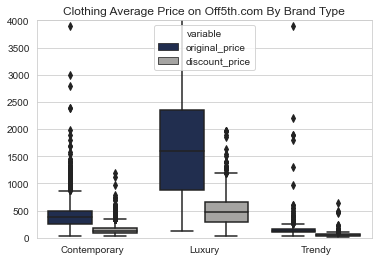

In [114]:
import seaborn as sns

sns.set_style("whitegrid")

ax = sns.boxplot(x="brand_positioning", y="value", hue="variable", 
                 data=off5th_melt.loc[off5th_melt['variable']!='percent_off'], 
                 palette=['#192b57','#a6a4a1'])
ax.set(ylim=(0, 4000))
ax.set(ylabel='',xlabel='',title = 'Clothing Average Price on Off5th.com By Brand Type')

In [115]:
fig = ax.get_figure()
fig.savefig("avg_off5_price.png")
fig.savefig("avg_off5_price.pdf")

In [116]:
import plotly.express as px

fig = px.parallel_categories(off5th_full.iloc[:,1:], color="percent_off", color_continuous_scale=px.colors.sequential.Cividis)
fig.show()

In [117]:
import plotly.express as px

fig = px.scatter(off5th_full, x="original_price", y="percent_off", color="brand_positioning",
                 hover_data=['brand_name'], 
                 color_discrete_sequence = ['rgb(25, 43, 87)','rgb(240, 188, 84)', 'rgb(166, 164, 161)'],
                 color_discrete_map = {"brand_positioning": ["Trendy", "Contemporary", "Luxury"]})
fig.update_layout(title_text="Scatter Plot for Original Price and Discount Percent",plot_bgcolor='rgb(256, 256, 256)')
fig.update_yaxes(title_text = 'Discount Percent',showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.update_xaxes(title_text = "Price(USD)") 

fig.show()

In [118]:
off5th_full['brand_positioning'].value_counts()

Contemporary    2849
Trendy          1546
Luxury           716
Name: brand_positioning, dtype: int64

In [119]:
import plotly.graph_objects as go

labels = ['Trendy','Contemporary','Luxury']
values = [1655, 2779, 677]
colors = ['rgb(25, 43, 87)','rgb(240, 188, 84)','rgb(220, 220, 220)']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [120]:
off5th_full['private_label'].value_counts()

Non-Private      4759
Private Label     352
Name: private_label, dtype: int64

In [121]:
import plotly.graph_objects as go

labels = ['Private Label','Non-Private']
values = [352, 4759]
colors = ['rgb(25, 43, 87)','rgb(220, 220, 220)'] #'rgb(201, 161, 91)',
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [122]:
off5th_full['category'].value_counts()

dresses                      3863
casual-button-down-shirts     632
dress-shirts                  616
Name: category, dtype: int64

In [123]:
import plotly.graph_objects as go

labels = ['dresses','casual-button-down-shirts','dress-shirts']
values = [3863, 632, 616]
colors = ['rgb(247, 146, 171)','rgb(173, 245, 100)','rgb(167, 197, 209)']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [124]:
colors = ['rgb(247, 146, 171)','rgb(173, 245, 100)','rgb(167, 197, 209)']
labels = ['dresses','casual-button-down-shirts']
fig = px.box(off5th_full, x="category", y="original_price", points='outliers', 
             color_discrete_sequence = colors,
#              color_discrete_map = {"category": labels})
             color_discrete_map={'Trendy':'rgb(25, 43, 87)',
                                 'Contemporary':'rgb(201, 161, 91)',
                                 'Luxury':'rgb(166, 164, 161)'
                                 })

fig.update_layout(title_text='Price By Category',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.show()

In [125]:
off5th_full.head()

,website,brand_name,product_name,category,department,original_price,discount_price,discount_amount,order,percent_off,private_label,brand_mean,brand_positioning
0,Off5th,A.L.C.,Metallic-Print Crewneck Mini Dress,dresses,women,150.0,129.99,13.0,3,13.34,Non-Private,573.333333,Contemporary
1,Off5th,Lafayette 148 New York,Coleen Geometric Shirtdress,dresses,women,998.0,398.99,60.0,9,60.02,Non-Private,751.260870,Contemporary
2,Off5th,Kate Spade New York,Gradient Long-Sleeve Sequin Mini Dress,dresses,women,598.0,238.99,60.0,11,60.04,Non-Private,407.230769,Contemporary
3,Off5th,Oscar de la Renta,Floral-Embroidered Short-Sleeve A-Line Dress,dresses,women,2990.0,729.99,75.0,29,75.59,Non-Private,3472.608696,Luxury
4,Off5th,Lafayette 148 New York,Bonnie Iridescent Sequin Shift Dress,dresses,women,998.0,398.99,60.0,33,60.02,Non-Private,751.260870,Contemporary


In [126]:
off5th_full.to_csv('off5th_processed.csv',index=False)